<a href="https://colab.research.google.com/github/soriiieee/kaggle-jwa/blob/master/1104_01_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# https://qiita.com/kyo92/items/ebeb5ea9ce216e1d6205 #google colaboで入力を自動化するコマンドqiita
# https://qiita.com/FukuharaYohei/items/27cd247342a0f7006511 #keras入門で単純なseq2seqを用いたモデル

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



E: Package 'python-software-properties' has no installation candidate


In [19]:
from google.colab import auth
auth.authenticate_user()

In [21]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()


In [22]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass() #vcode
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [23]:
# option module import 
!pip install yfinance
!pip install yahoofinancials

In [24]:
vcode

''

In [28]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
from datetime import datetime, timedelta
from bs4 import BeautifulSoup  
from urllib import request

import yfinance as yf
#https://pypi.org/project/yfinance/
from yahoofinancials import YahooFinancials

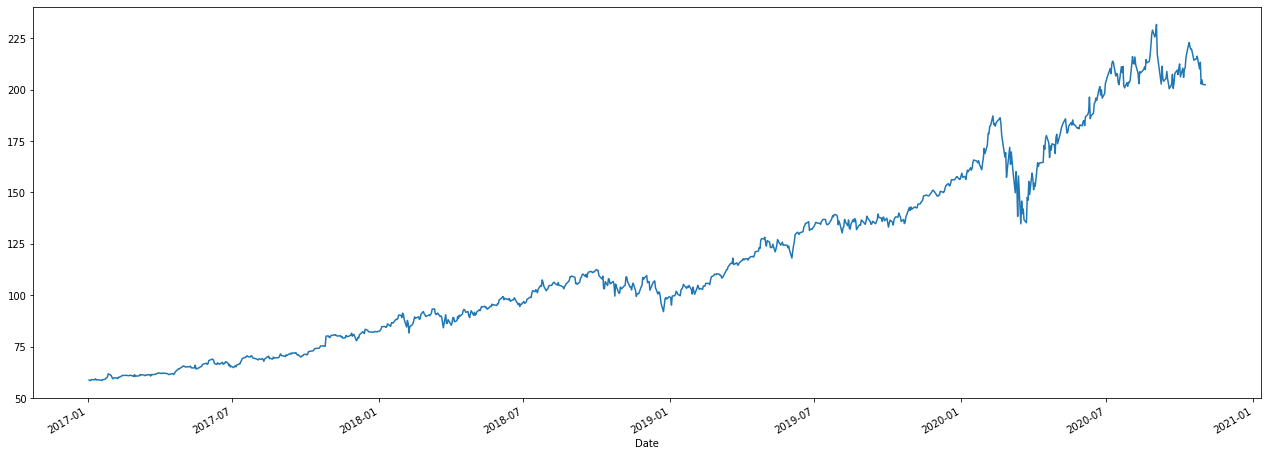

In [31]:
def get_info(ticker):
  data = yf.Ticker(ticker)
  return data

def get_hist(dt):
  start_time = datetime(2017,1,1)
  end_time = datetime.now() -timedelta(days=1)
  hist = dt.history(start=start_time, end=end_time)
  return hist

f,ax = plt.subplots(1,1,figsize=(22,8))
st = get_info("MSFT")
hist = get_hist(st)
hist["Close"].plot(ax=ax)
# hist.head()

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
price = mms.fit_transform(hist["Close"].values.reshape(-1,1))
# price[:10]


array([[0.00152069],
       [0.        ],
       [0.        ],
       [0.00293274],
       [0.00184654],
       [0.00173788],
       [0.00483354],
       [0.00168358],
       [0.00217243],
       [0.00124912]])

In [39]:
hist.shape #966,7
len_train = 866

train0 = hist.iloc[:len_train, :].tail(800)
train1 = hist.iloc[30:30+len_train].tail(800)

test0 = hist.iloc[len_train:len_train+30, :]
test1 = hist.iloc[len_train+30:, :]

train0.shape,train1.shape

((800, 7), (800, 7))

NameError: ignored

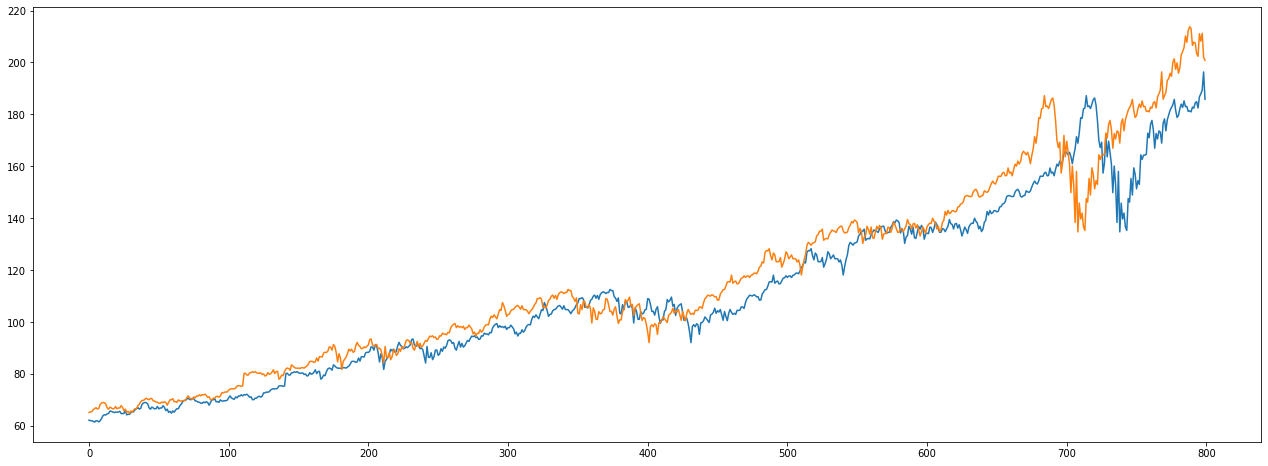

In [41]:
f,ax = plt.subplots(1,1,figsize=(22,8))
ax.plot(train0["Close"].values, label="train0")
ax.plot(train1["Close"].values, label="train1")
plot.show()

In [35]:
from keras import Model
from keras.layers import Dense , LSTM, Input
from keras.utils.vis_utils import plot_model


In [44]:
n_rnn = 30
n_sample = train.shape[0] -n_rnn #800-30
n_in_out = 1 #in-out-node
n_mid = 20 #middle layer 

shape_=(n_sample, n_rnn,)

x_encoder = np.zeros(shape_)
x_decoder = np.zeros(shape_)
y_decoder = np.zeros(shape_)

for i in range(n_sample):
  x_encoder[i] = train0["Close"].values[i:i+n_rnn] 
  x_decoder[i,1:] = train1["Close"].values[i:i+n_rnn-1]
  y_decoder[i] = train1["Close"].values[i:i+n_rnn]

In [46]:
shape_ + (n_in_out,)

(770, 30, 1)

In [ ]:
def train_model():
  #input
  encoder_input = Input(shape=(n_rnn, n_in_out))
  decoder_input = Input(shape=(n_rnn, n_in_out))
  #encoder
  encoder_output, state_h, state_c = LSTM(n_mid,)